# Phase 3 Code Challenge Review

Made using resources from the Seattle team - thanks y'all.

## Overview

* Gradient Descent
* Logistic Regression
* Classification Metrics
* Decision Trees

In [17]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.tree import export_graphviz
# import graphviz

In [18]:
# from src.call import call_on_students

## Part 1: Gradient Descent

### Set Up

In [19]:
# Grab the data from 'auto-mpg.csv'
mpg_df = pd.read_csv("data/auto-mpg.csv")

In [20]:
# Explore the data
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


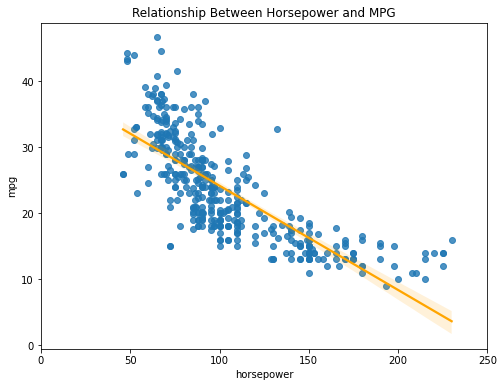

In [21]:
# Let's plot a simple linear regression line using just the horsepower column
plt.figure(figsize=(8, 6))
sns.regplot(x='horsepower', y='mpg', data=mpg_df, line_kws={"color":"orange"})
plt.title('Relationship Between Horsepower and MPG')
plt.xlim(0, 250)
plt.show()

The above graph shows an approximate best fit line for the relationship between `horsepower` and `mpg` in our data.


### 1) Describe the below chart: What is it showing? What does it tell us?

![Slope-RSS relationship image](images/slope-rss-relationship.png)

In [22]:
# call_on_students(1)

#### Answer: 

- Looking at a cost function. With respect to slope. 
- Slope  is our coefficient

### 2) Imagine that you're starting at a slope towards the top upper left corner. Using Zoom's annotate feature, demonstrate how gradient descent would work 

In [23]:
# call_on_students(1)

Gradient descent step size are a portion of the slope. Therefore, the higher you are on the left, the bigger the step size. As you get closer to the middle, the step sizes get smaller.

### 3) What is a step size when talking about gradient descent? How does learning rate regulate step size?

In [24]:
# call_on_students(1)

#### Answer: 

- $\alpha$ is a hyperparameter used as the fraction value of the slope. This is the learning rate. The higher the $\alpha$ (0 $\geq$ $\alpha$ $\geq$ 1), the bigger the step


## Part 2: Logistic Regression

### 4) Describe a logistic regression model:

- What kind of target is a logistic regression model used for?
- What are the predictions that a logistic regression model outputs?
- How is it different from linear regression?
- Is it a parametric or non-parametric model?

In [25]:
# call_on_students(1)

#### Answer: 

- Target: Binary (could be multi class)
- Predict returns class, Predict_proba returns  probability values
- Linear regression is continuous and Logistics regression (catagorical)
    - Linear Regression cost function is RMSE, Logistic Regression cost function is log_loss
- Parametric


### 5) Compare a logistic regression model to any of the other model types we've learned:

- List one benefit of logistic regression when compared to the other model type
- List one reason the other model type might be more useful

In [26]:
# call_on_students(1)

#### Answer: 

- Customizable threshold for your classification
- Whitebox. Easy to interpret
- Can get important features AND its effect on the target
- Not prone to overfit compared to Decision Tree


- Not as good at multi class classification. Prone to underfit compared to kNN
- Doesn't handle interactions b/t features well
- Inable to handle class imbalances

## Part 3: Logistic Regression and Classification Metrics with Code

### Set Up

In [27]:
# Let's use the same data, but now with a classification target
mpg_class = pd.read_csv('data/auto-mpg-classification.csv')

In [28]:
# Check this new dataframe out
mpg_class.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,target
0,8,307.0,130,3504,12.0,70,1,0
1,8,350.0,165,3693,11.5,70,1,1
2,8,318.0,150,3436,11.0,70,1,0
3,8,304.0,150,3433,12.0,70,1,1
4,8,302.0,140,3449,10.5,70,1,1


### 6) Prepare our data for modeling:

1. Perform a train/test split
2. Scale the inputs


In [29]:
# call_on_students(1)

In [30]:
X=mpg_class.drop(columns=['target'])
y=mpg_class.target

In [31]:
# Train-test split
# Set test_size=0.33 and random_state=42
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [33]:
# Scale the data
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

### 7) Explore the `target` column and our model-less baseline

1. What is the breakdown of the `target` column in our training data?
2. What would a model-less baseline look like in this context?
3. How accurate would that model-less understanding be on our test data?

In [ ]:
# call_on_students(1)

In [36]:
y.value_counts()

0    293
1     99
Name: target, dtype: int64

In [37]:
y.value_counts(normalize=True)

0    0.747449
1    0.252551
Name: target, dtype: float64

#### Part 1: explore the target column breakdown in train data

In [43]:
# Code to explore
y_train.value_counts()

0    195
1     67
Name: target, dtype: int64

In [44]:
# Code to explore
y_train.value_counts(normalize=True)

0    0.744275
1    0.255725
Name: target, dtype: float64

#### Answer:

- Even though there is a class imbalance
- The class imbalance between training and the original DF is the same

#### Part 2: What would a model-less baseline look like in this context?

#### Answer:

- 74.4% accurate. Because of class imbalance we'd be right 74% of the time even if we predict '0' all the time

#### Part 3: How accurate would that baseline be on test data?


In [49]:
# Code to find the answer
from sklearn.dummy import DummyClassifier
dumdum = DummyClassifier(strategy = 'most_frequent')
dumdum.fit(X_train_sc, y_train)
dumdum.score(X_test_sc, y_test)

0.7538461538461538

#### Answer:

- Pretty close to our initial impression of being close to 74.4% accurate


### 8) What is one problem you could foresee based on this breakdown, and what is one strategy you could employ to address that problem?

In [ ]:
# call_on_students(1)

#### Answer:
The model's predictive ability  might be impaired because of the class imbalance

Few strategys:
- Oversample our minority target. SMOTE
- Under sample majority target. You lose actual data though
- Adjust class weight parameter

### 9) Fit a logistic regression model, and plot a confusion matrix of the results on our test set

In [50]:
# call_on_students(1)

In [56]:
# Fit a logistic regression model
# Name the model `logreg` and set random_state = 42
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_sc,y_train)

LogisticRegression(random_state=42)

C:\Users\saads\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


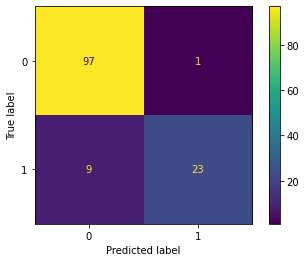

In [57]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(logreg,
                      X=X_test_sc,
                      y_true=y_test)

### 10) Calculate the accuracy, precision, recall and f1-score for the test set

You can use the confusion matrix above, or sklearn functions

In [ ]:
# call_on_students(1)

In [59]:
preds = logreg.predict(X_test_sc)

In [60]:
# Accuracy
accuracy_score(y_test,preds)

0.9230769230769231

In [61]:
# Precision
precision_score(y_test,preds)

0.9583333333333334

In [62]:
# Recall
recall_score(y_test,preds)

0.71875

In [63]:
# F1-Score
f1_score(y_test,preds)

0.8214285714285714

In [77]:
from sklearn.metrics import log_loss
probs = logreg.predict_proba(X_test_sc)
log_loss(y_test, probs)

0.17246330647509928

### 11) Calculate the ROC-AUC on the test set, and plot the ROC curve

For this you'll definitely want to use the sklearn functions!

In [ ]:
# call_on_students(1)

In [80]:
# Calculate roc-auc
roc_auc_score(y_test,probs[:,1])

0.9811862244897959

C:\Users\saads\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


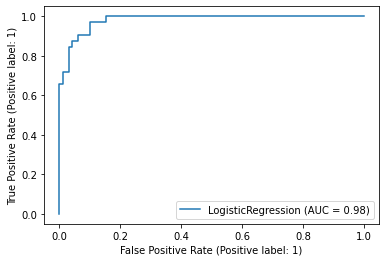

In [81]:
# Plot the ROC curve
plot_roc_curve(logreg,X_test_sc,y_test)

### 12) Evaluate! Based on the metrics of our test data, how is our model doing?

In [ ]:
# call_on_students(1)

#### Answer:

- Performing substantially better in accuracy
- Precision is a high performing metric
- F1 score brought down by bad recall


## Part 4: Decision Trees

### Set Up

NOTE! This code might not work for you! The images these generate are already prepopulated below because of that.

In [66]:
# Helper function from a colleague (h/t Bryan)
def plot_tree(dt, used_cols, out_file='mytree.dot'):
    export_graphviz(dt, out_file=out_file, 
                    filled=True, feature_names=used_cols, 
                    leaves_parallel=True, node_ids=True)
    with open(out_file) as f:
        dot_graph = f.read()
    return graphviz.Source(dot_graph)

In [67]:
# Creating two different decision trees with a single split
dt_maxdepth1_v1 = DecisionTreeClassifier(max_depth=1, random_state = 42)
dt_maxdepth1_v2 = DecisionTreeClassifier(max_depth=1, random_state = 42)

# Training the two trees on different columns
dt_maxdepth1_v1.fit(X_train[['weight']], y_train)
dt_maxdepth1_v2.fit(X_train[['origin']], y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

In [68]:
# Tree based on 1st column
plot_tree(dt_maxdepth1_v1, ['weight'])

NameError: name 'graphviz' is not defined

In [ ]:
# Tree based on 2nd column
plot_tree(dt_maxdepth1_v2, ['origin'])

#### Images:

| Version 1: Weight | Version 2: Origin |
| ----------------- | ----------------- |  
| ![max depth 1 - version 1](images/dt-maxdepth1-v1.png) | ![max depth 1 - version 2](images/dt-maxdepth1-v2.png) |

### 13) Which of these trees does a better job splitting the data? How can you tell?

In [ ]:
# call_on_students(1)

#### Answer:

- v2 is less imbalanced. Number of samples 
- v2 'True' node, has high gini impurity. v1 nodes are purer.

- Based of gini impurity the first tree creates more pure nodes, does a better job of splitting data. Could look at values as well


### 14) Fit a decision tree model, and plot a confusion matrix of the results on our test set

In [ ]:
# call_on_students(1)

In [91]:
# Fit a decision tree model
# Name the model `dt` and set random_state = 42
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_sc,y_train)

DecisionTreeClassifier(random_state=42)

C:\Users\saads\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


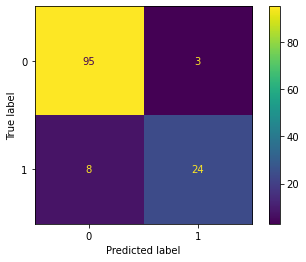

In [92]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(dt,X_test_sc,y_test)

C:\Users\saads\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\saads\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


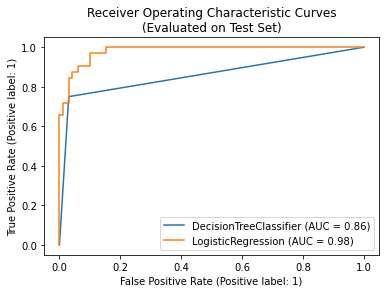

In [93]:
# Code to visualize the ROC curves for the models we've done
fig, ax = plt.subplots()
plot_roc_curve(dt, X_test_sc, y_test, ax=ax)
plot_roc_curve(logreg, X_test_sc, y_test, ax=ax)

plt.title("Receiver Operating Characteristic Curves\n(Evaluated on Test Set)")
plt.show()

### 15) Which is the better model according to ROC-AUC score? How can you tell?

In [ ]:
# call_on_students(1)

#### Answer:

- Logistic Regression is performing better, AUC score is higher
